#Import Library

In [ ]:
#Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Baca dataset
df = pd.read_csv("/content/drive/MyDrive/Penambangan Data/Tugas Case Based Classification/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preprocessing

In [ ]:
#Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Cek Data Duplikat
duplicate = df[df.duplicated()]
duplicate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
df['Outcome'].unique()

array([1, 0])

In [ ]:
#Cek Jumlah Outcome
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

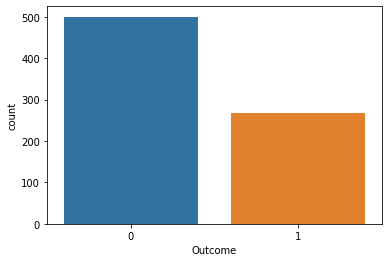

In [ ]:
sns.countplot(data=df, x='Outcome')



*   Feature Selection



In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
#Melihat Korelasi Data
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


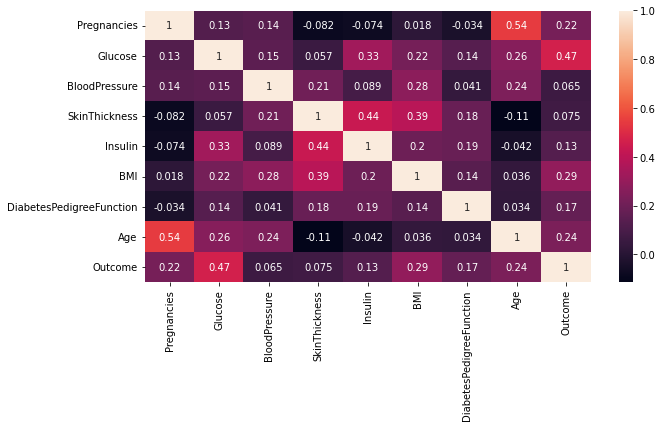

In [ ]:
#Melihat Korelasi Data (Heatmap)
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True)

In [ ]:
#Data Yang Digunakan Adalah Data Yang Berkorelasi Tinggi Dengan Outcome (>2)
#Pregnancies, Glucose, BMI, Age

In [ ]:
#Drop Data Yang Tidak Digunakan
df_use = df.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'], axis=1)
df_use.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1




*   Data Cleansing




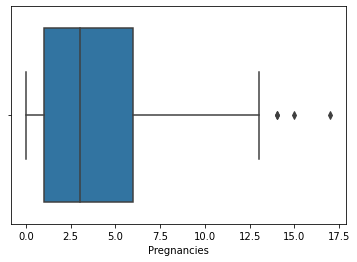

In [ ]:
#Cek Outlier Pregnancies
sns.boxplot(x='Pregnancies',data=df_use)

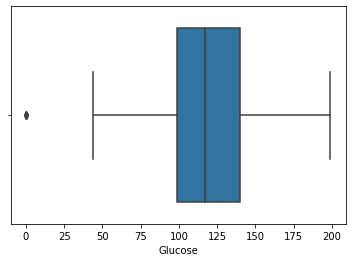

In [ ]:
#Cek Outlier Glucose
sns.boxplot(x='Glucose',data=df_use)

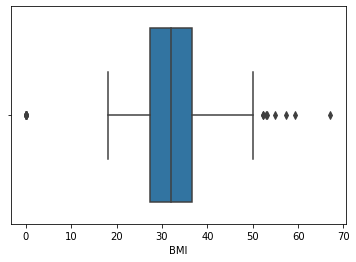

In [ ]:
#Cek Outlier BMI
sns.boxplot(x='BMI',data=df_use)

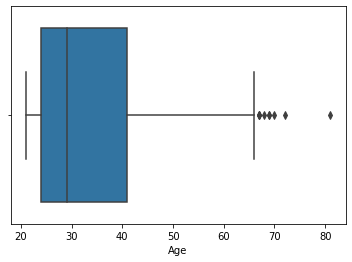

In [ ]:
#Cek Outlier Age
sns.boxplot(x='Age',data=df_use)

In [ ]:
#Cek Nilai q1, q3, selisih q3 dengan q1, batas bawah, batas atas
#Data Pregnancies, Glucose, BMI, Age

In [ ]:
#Data Pregnancies
q1_preg, q3_preg = np.percentile(df_use['Pregnancies'],[25,75])
selisih_preg = q3_preg - q1_preg
ba_preg = q3_preg + (1.5*selisih_preg)
bb_preg = q1_preg - (1.5*selisih_preg)

print('Nilai Q1:', q1_preg)
print('Nilai Q3:', q3_preg)
print('Nilai Selisih:', selisih_preg)
print('Nilai Batas Atas:', ba_preg)
print('Nilai Batas Bawah:', bb_preg)

Nilai Q1: 1.0
Nilai Q3: 6.0
Nilai Selisih: 5.0
Nilai Batas Atas: 13.5
Nilai Batas Bawah: -6.5


In [ ]:
#Data Outlier Pregnancies
out_preg = df_use[(df_use['Pregnancies'] < bb_preg) | (df_use['Pregnancies'] > ba_preg)]
out_preg

,Pregnancies,Glucose,BMI,Age,Outcome
88,15,136,37.1,43,1
159,17,163,40.9,47,1
298,14,100,36.6,46,1
455,14,175,33.6,38,1


In [ ]:
#Data Glucose
q1_glu, q3_glu = np.percentile(df_use['Glucose'],[25,75])
selisih_glu = q3_glu - q1_glu
ba_glu = q3_glu + (1.5*selisih_glu)
bb_glu = q1_glu - (1.5*selisih_glu)

print('Nilai Q1:', q1_glu)
print('Nilai Q3:', q3_glu)
print('Nilai Selisih:', selisih_glu)
print('Nilai Batas Atas:', ba_glu)
print('Nilai Batas Bawah:', bb_glu)

Nilai Q1: 99.0
Nilai Q3: 140.25
Nilai Selisih: 41.25
Nilai Batas Atas: 202.125
Nilai Batas Bawah: 37.125


In [ ]:
#Data Outlier Glucose
out_glu = df_use[(df_use['Glucose'] < bb_glu) | (df_use['Glucose'] > ba_glu)]
out_glu

,Pregnancies,Glucose,BMI,Age,Outcome
75,1,0,24.7,22,0
182,1,0,27.7,21,0
342,1,0,32.0,22,0
349,5,0,41.0,37,1
502,6,0,39.0,41,1


In [ ]:
#Data BMI
q1_bmi, q3_bmi = np.percentile(df_use['BMI'],[25,75])
selisih_bmi = q3_bmi - q1_bmi
ba_bmi = q3_bmi + (1.5*selisih_bmi)
bb_bmi = q1_bmi - (1.5*selisih_bmi)

print('Nilai Q1:', q1_bmi)
print('Nilai Q3:', q3_bmi)
print('Nilai Selisih:', selisih_bmi)
print('Nilai Batas Atas:', ba_bmi)
print('Nilai Batas Bawah:', bb_bmi)

Nilai Q1: 27.3
Nilai Q3: 36.6
Nilai Selisih: 9.3
Nilai Batas Atas: 50.550000000000004
Nilai Batas Bawah: 13.35


In [ ]:
#Data Outlier BMI
out_bmi = df_use[(df_use['BMI'] < bb_bmi) | (df_use['BMI'] > ba_bmi)]
out_bmi

,Pregnancies,Glucose,BMI,Age,Outcome
9,8,125,0.0,54,1
49,7,105,0.0,24,0
60,2,84,0.0,21,0
81,2,74,0.0,22,0
120,0,162,53.2,25,1
125,1,88,55.0,26,1
145,0,102,0.0,21,0
177,0,129,67.1,26,1
193,11,135,52.3,40,1
247,0,165,52.3,23,0


In [ ]:
#Data Age
q1_age, q3_age = np.percentile(df_use['Age'],[25,75])
selisih_age = q3_age - q1_age
ba_age = q3_age + (1.5*selisih_age)
bb_age = q1_age - (1.5*selisih_age)

print('Nilai Q1:', q1_age)
print('Nilai Q3:', q3_age)
print('Nilai Selisih:', selisih_age)
print('Nilai Batas Atas:', ba_age)
print('Nilai Batas Bawah:', bb_age)

Nilai Q1: 24.0
Nilai Q3: 41.0
Nilai Selisih: 17.0
Nilai Batas Atas: 66.5
Nilai Batas Bawah: -1.5


In [ ]:
#Data Outlier Age
out_age = df_use[(df_use['Age'] < bb_age) | (df_use['Age'] > ba_age)]
out_age

,Pregnancies,Glucose,BMI,Age,Outcome
123,5,132,26.8,69,0
363,4,146,38.5,67,1
453,2,119,19.6,72,0
459,9,134,25.9,81,0
489,8,194,26.1,67,0
537,0,57,21.7,67,0
666,4,145,32.5,70,1
674,8,91,35.6,68,0
684,5,136,0.0,69,0


In [ ]:
#Print Index Data Outlier
print(out_preg.index)
print(out_glu.index)
print(out_bmi.index)
print(out_age.index)

Int64Index([88, 159, 298, 455], dtype='int64')
Int64Index([75, 182, 342, 349, 502], dtype='int64')
Int64Index([  9,  49,  60,  81, 120, 125, 145, 177, 193, 247, 303, 371, 426,
            445, 494, 522, 673, 684, 706],
           dtype='int64')
Int64Index([123, 363, 453, 459, 489, 537, 666, 674, 684], dtype='int64')


In [ ]:
#Drop Data Outlier
df_nonout = df_use.drop([88, 159, 298, 455, 
               75, 182, 342, 349, 
               502, 9,  49,  60,  
               81, 120, 125, 145, 
               177, 193, 247, 303, 
               371, 426, 445, 494, 
               522, 673, 684, 706, 
               123, 363, 453, 459, 
               489, 537, 666, 674])
df_nonout.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


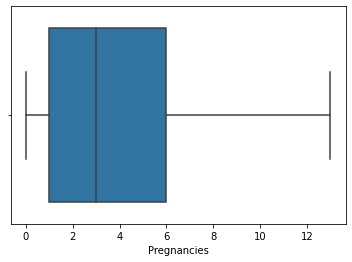

In [ ]:
#Cek Outlier Pregnancies
sns.boxplot(x='Pregnancies',data=df_nonout)

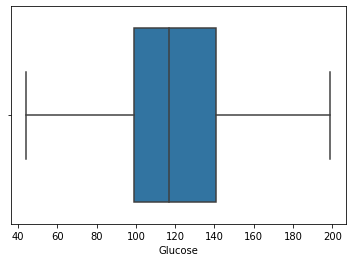

In [ ]:
#Cek Outlier Glucose
sns.boxplot(x='Glucose',data=df_nonout)

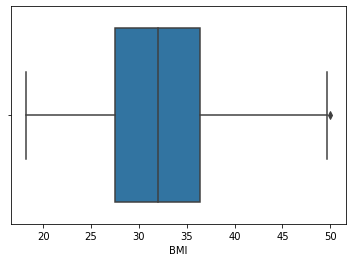

In [ ]:
#Cek Outlier BMI
sns.boxplot(x='BMI',data=df_nonout)

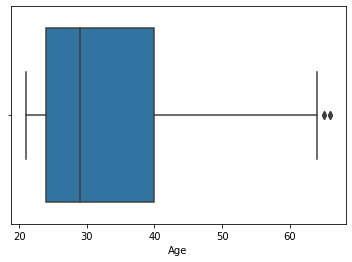

In [ ]:
#Cek Outlier Age
sns.boxplot(x='Age',data=df_nonout)



*   Balancing Data







In [ ]:
df_nonout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 767
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  732 non-null    int64  
 1   Glucose      732 non-null    int64  
 2   BMI          732 non-null    float64
 3   Age          732 non-null    int64  
 4   Outcome      732 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.3 KB


In [ ]:
df_nonout.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,732.0,3.792350,3.276672,0.0,1.0,3.0,6.000,13.0
Glucose,732.0,121.599727,30.455092,44.0,99.0,117.0,141.000,199.0
BMI,732.0,32.215164,6.488070,18.2,27.5,32.0,36.425,50.0
Age,732.0,32.924863,11.147860,21.0,24.0,29.0,40.000,66.0
Outcome,732.0,0.344262,0.475452,0.0,0.0,0.0,1.000,1.0


In [ ]:
df_nonout['Outcome'].unique()

array([1, 0])

In [ ]:
df_nonout['Outcome'].value_counts()

0    480
1    252
Name: Outcome, dtype: int64

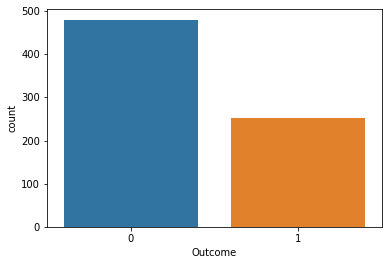

In [ ]:
sns.countplot(data=df_nonout, x='Outcome')

In [ ]:
#Menghapus Sebagian Data Outcome "0" Agar Seimbang
df_balanced = (df_nonout.groupby('Outcome', as_index=False)
              .apply(lambda x: x.sample(n=252))
              .reset_index(drop=True))

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  504 non-null    int64  
 1   Glucose      504 non-null    int64  
 2   BMI          504 non-null    float64
 3   Age          504 non-null    int64  
 4   Outcome      504 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.8 KB


In [ ]:
df_balanced['Outcome'].unique()

array([0, 1])

In [ ]:
df_balanced['Outcome'].value_counts()

0    252
1    252
Name: Outcome, dtype: int64

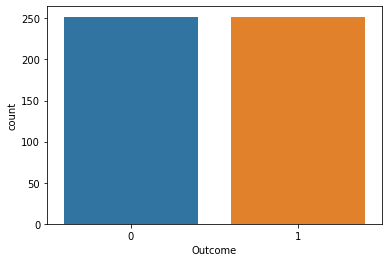

In [ ]:
sns.countplot(data=df_balanced, x='Outcome')

In [ ]:
df_balanced.describe()

,Pregnancies,Glucose,BMI,Age,Outcome
count,504.000000,504.000000,504.000000,504.000000,504.000000
mean,4.011905,126.255952,32.759524,33.513889,0.500000
std,3.421348,31.105221,6.597923,10.905149,0.500497
min,0.000000,44.000000,18.200000,21.000000,0.000000
25%,1.000000,104.000000,27.775000,24.750000,0.000000
50%,3.000000,121.500000,32.800000,30.500000,0.500000
75%,6.000000,146.250000,37.025000,41.000000,1.000000
max,13.000000,199.000000,50.000000,66.000000,1.000000




*   Pemisahan Data Independen dan Dependen




In [ ]:
#Pisah data independen dan dependen
x = df_balanced.drop('Outcome', axis=1)
y = df_balanced['Outcome']

In [ ]:
#data independen
x.head()

,Pregnancies,Glucose,BMI,Age
0,1,103,19.4,22
1,4,83,29.3,34
2,1,71,33.2,21
3,3,106,30.9,24
4,0,95,44.6,22


In [ ]:
#data dependen
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64



*   Normalisasi Data




In [ ]:
#Normalisasi data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) #Skala 0-1
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3
0,0.076923,0.380645,0.037736,0.022222
1,0.307692,0.251613,0.349057,0.288889
2,0.076923,0.174194,0.471698,0.000000
3,0.230769,0.400000,0.399371,0.066667
4,0.000000,0.329032,0.830189,0.022222




*   Split Data Train dan Test




In [ ]:
#Splitting data train dan test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0) #jumlah test 30% dan train 70%
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(352, 4)
(152, 4)
(352,)
(152,)


# KNN

In [ ]:
#Klasifikasi dengan KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=9) #Jumlah K=9
knn.fit(x_train, y_train)

#Nilai akurasi (%)
print("Train Set Accuracy: "+str(accuracy_score(y_train, knn.predict(x_train))*100)) 
print("Test Set Accuracy: "+str(accuracy_score(y_test,knn.predict(x_test))*100))

Train Set Accuracy: 78.125
Test Set Accuracy: 80.26315789473685


In [ ]:
train_pred = knn.predict(x_train)
test_pred = knn.predict(x_test)

In [ ]:
#Confusion Matrix Train
confusion_matrix(y_train, train_pred)

array([[129,  48],
       [ 29, 146]])

In [ ]:
#Confusion Matrix Test
confusion_matrix(y_test, test_pred)

array([[60, 15],
       [15, 62]])